# **Projeto**

Nessa sessão iremos realizar a criação de modelos de machine learning e utilizar o melhor que se enquandra nos dados de treinamento utilizando diversas tecnicas de avaliação de modelos. vizualizaremos tambem quais variaveis que tem maior impacto para o treinamento do modelo e por fim, após acharmos o melhor modelo, vamos criar uma pipeline para conseguir colocar o modelo em produção.

# **Importação dos pacotes**

In [ ]:
import pandas as pd
import numpy as np
from google.colab import files
import seaborn as sns
from matplotlib import pyplot as plt
from joblib import dump

# Pacotes de Pré-processamento de dados
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import make_column_transformer
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import make_pipeline

# Pacotes de Machine Learning
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import RandomizedSearchCV


# Pacotes de avaliação do modelo
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score

import warnings
warnings.filterwarnings('ignore')

# **Visualização dos dados**

In [ ]:
# leitura dos dataset já tratado
df_status = pd.read_csv('https://raw.githubusercontent.com/Diderotcm/Solid-bank/main/dados/dados_preparados.csv')
df_status.head()

,ID,BOM,GENERO,TEM_CARRO,IMOVEL_PROPRIO,N_FILHOS,RENDIMENTO_ANUAL,CAT_RENDA,ESCOLARIDADE,ESTADO_CIVIL,TIPO_RESIDENCIA,OCUPACAO,TAM_FAMILIA,IDADE,ANOS_EMPREGO
0,5008804,1,M,1,1,0,427500.0,Trabalhando,Ensino superior,Uniao estavel,Apartamento alugado,Outro,2.0,33,13
1,5008805,1,M,1,1,0,427500.0,Trabalhando,Ensino superior,Uniao estavel,Apartamento alugado,Outro,2.0,33,13
2,5008806,1,M,1,1,0,112500.0,Trabalhando,Ensino medio,Casado,Casa/apartamento,Seguranca,2.0,59,4
3,5008808,1,F,0,1,0,270000.0,Associado comercial,Ensino medio,Solteiro,Casa/apartamento,Vendas,1.0,53,9
4,5008809,1,F,0,1,0,270000.0,Associado comercial,Ensino medio,Solteiro,Casa/apartamento,Vendas,1.0,53,9


In [ ]:
# Visualizando desbalanceamento dos dados
df_status.BOM.value_counts()

1    34924
0      607
Name: BOM, dtype: int64

In [49]:
df_status[df_status['BOM']==0]

,CAT_RENDA,ESCOLARIDADE,ESTADO_CIVIL,TIPO_RESIDENCIA,OCUPACAO,TAM_FAMILIA,IDADE,ANOS_EMPREGO,TEM_CARRO,IMOVEL_PROPRIO,N_FILHOS,RENDIMENTO_ANUAL,BOM
19,Pensionista,Ensino superior,Casado,Casa/apartamento,Outro,2.0,52,0,1,1,0,180000.0,0
525,Associado comercial,Ensino superior,Casado,Casa/apartamento,Outro,2.0,37,13,0,0,0,180000.0,0
558,Trabalhando,Ensino medio,Separado,Apartamento cooperativo,construcao civil,2.0,33,4,1,0,1,112500.0,0
638,Trabalhando,Ensino medio,Casado,Casa/apartamento,construcao civil,2.0,53,9,0,0,0,238500.0,0
726,Associado comercial,Ensino superior,Casado,Casa/apartamento,Outro,2.0,38,2,1,0,0,315000.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
35178,Associado comercial,Ensino superior,Casado,Casa/apartamento,Medico,2.0,34,4,0,1,0,157500.0,0
35182,Pensionista,Ensino superior,Casado,Casa/apartamento,Medico,2.0,34,4,0,1,0,157500.0,0
35348,Trabalhando,Ensino medio,Casado,Casa/apartamento,Vendas,2.0,50,2,0,1,0,283500.0,0
35428,Trabalhando,Ensino medio,Casado,Casa/apartamento,construcao civil,2.0,53,1,1,1,0,90000.0,0


In [ ]:
df_status.describe()

,ID,BOM,TEM_CARRO,IMOVEL_PROPRIO,N_FILHOS,RENDIMENTO_ANUAL,TAM_FAMILIA,IDADE,ANOS_EMPREGO
count,3.553100e+04,35531.000000,35531.000000,35531.000000,35531.000000,35531.000000,35531.000000,35531.000000,35531.000000
mean,5.078296e+06,0.982916,0.379162,0.671357,0.429569,182002.548127,2.196279,44.088177,6.406378
std,4.185042e+04,0.129585,0.485185,0.469726,0.741601,81543.895234,0.912390,11.497719,6.559209
min,5.008804e+06,0.000000,0.000000,0.000000,0.000000,56250.000000,1.000000,21.000000,0.000000
25%,5.042060e+06,1.000000,0.000000,0.000000,0.000000,121500.000000,2.000000,34.000000,2.000000
50%,5.074638e+06,1.000000,0.000000,1.000000,0.000000,157500.000000,2.000000,43.000000,5.000000
75%,5.115404e+06,1.000000,1.000000,1.000000,1.000000,225000.000000,3.000000,54.000000,9.000000
max,5.150487e+06,1.000000,1.000000,1.000000,19.000000,531000.000000,20.000000,69.000000,43.000000


In [ ]:
# Reorganizando colunas no conjunto de dados.
df_status = df_status[['ID','CAT_RENDA', 'ESCOLARIDADE', 'ESTADO_CIVIL',
       'TIPO_RESIDENCIA', 'OCUPACAO', 'TAM_FAMILIA', 'IDADE', 'ANOS_EMPREGO','GENERO', 'TEM_CARRO', 'IMOVEL_PROPRIO', 'N_FILHOS',
       'RENDIMENTO_ANUAL','BOM']]

In [ ]:
# Drop da coluna de ID ja que nao contem informação alem do identificador do cliente
df_status.drop(['ID','GENERO'],axis=1,inplace=True)

In [ ]:
# Separando colunas categoricas para aplicação do OneHotEncoder.
cat_col = ['CAT_RENDA','ESCOLARIDADE','ESTADO_CIVIL','TIPO_RESIDENCIA','OCUPACAO']

# Separação de colunas numericas para escalar nossos dados
num_col = ['TAM_FAMILIA','IDADE','ANOS_EMPREGO','N_FILHOS','RENDIMENTO_ANUAL']

# **Funções auxiliares**

---



In [ ]:

def transformar_dados(dados,colunas_categoricas,colunas_numericas):

    # aplica o OneHotEncoder e StandardScales apenas em colunas selecionadas
    transformer = make_column_transformer(
    (OneHotEncoder(), colunas_categoricas),
    (StandardScaler(), colunas_numericas),
    remainder='passthrough')

    # transforma em uma DataFrame do pandas
    transformed = transformer.fit_transform(dados)
    transformed_df = pd.DataFrame(transformed.toarray(), 
    columns=transformer.get_feature_names_out())

    return transformed_df

In [ ]:
def enc_scaler(colunas_categoricas,colunas_numericas):
    #aplica o OneHotEncoder apenas nas colunas selecionadas
    transformer = make_column_transformer(
    (OneHotEncoder(), colunas_categoricas),
    (StandardScaler(), colunas_numericas),
    remainder='passthrough')

    return transformer

In [ ]:
# Função para plotagem de uma matrix de confusão
def matrix_confusao(y_test,y_pred):

    cf_matrix = confusion_matrix(y_test, y_pred)

    group_names = ['True Neg','False Pos','False Neg','True Pos']

    group_counts = ['{0:0.0f}'.format(value) for value in cf_matrix.flatten()]

    group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]

    labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]

    labels = np.asarray(labels).reshape(2,2)
    
    sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')

    

In [ ]:
def testar_modelo(modelo,dados):
    # Divisão de dados de variaveis explicativas e target
    X = dados.drop('remainder__BOM',axis=1)
    y = dados['remainder__BOM']

    # Divisão de dados de teste e treino
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

    # Balanceamento do conjunto de dados
    smote = SMOTE()
    X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

    # Treinamento do modelo
    modelo.fit(X_resampled,y_resampled)

    # Calculo do AUC e probabilidade.
    predict_prob = modelo.predict_proba(X_test)
    auc = roc_auc_score(y_test, predict_prob[:,1])
    print(f"AUC: {auc}")

    # Matrix de confusão
    y_pred = modelo.predict(X_test)
    matrix_confusao(y_test,y_pred);

    # F1 score
    f1= f1_score(y_test, y_pred)
    print(f'F1 score:{f1}');


# **Teste de modelos**

In [ ]:
# craição de diverso modelos
gbc = GradientBoostingClassifier()
clf = RandomForestClassifier(random_state = 99)
xgb = XGBClassifier()
etc = ExtraTreesClassifier()

In [ ]:
# transformar dados para treinamento do modelo
df = transformar_dados(df_status,cat_col,num_col)

AUC: 0.7914757418430287
F1 score:0.9890909090909091


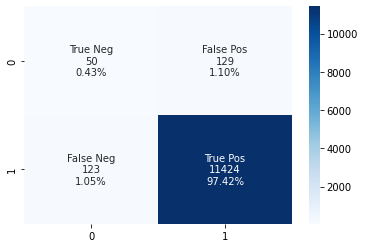

In [ ]:
testar_modelo(clf,df)

AUC: 0.5764057316394062
F1 score:0.9723635725565889


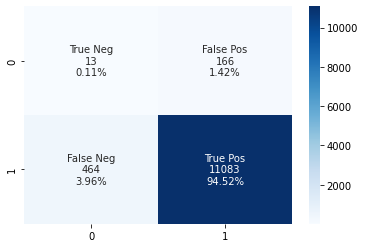

In [ ]:
testar_modelo(gbc,df)

AUC: 0.5715736463024811
F1 score:0.9692355090004842


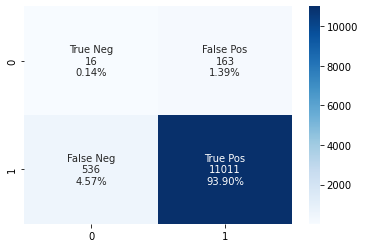

In [ ]:
testar_modelo(xgb,df)

AUC: 0.7856777232520188
F1 score:0.9876232249098884


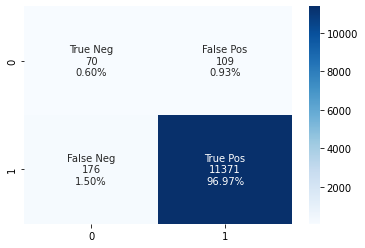

In [ ]:
testar_modelo(etc,df)

Observando que o random foreste foi o medelo com melhor avaliação entre os demais iremos realizar a otimização de hiper paramentros com ele!

In [ ]:
# Divisão de dados de variaveis explicativas e target
X = df.drop('remainder__BOM',axis=1)
y = df['remainder__BOM']

# Bivisão de dados de teste e treino
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# Balanceamento do conjunto de dados
smote = SMOTE()
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# # Definição dos parâmetros
# param_dist = {"max_depth": [7, 8, 12, None],
#               "max_features": [22, 26, 32, 36],
#               "min_samples_split": [8, 10, 11],
#               "min_samples_leaf": [1, 2, 3],
#               "bootstrap": [True, False],
#               "n_estimators":[50,100,150]}

# # Para o classificador criado com RandomForest, testamos diferentes combinações de parâmetros
# rsearch = RandomizedSearchCV(clf, param_distributions = param_dist, n_iter = 25, return_train_score = True)  

# # Aplicando o resultado ao conjunto de dados de treino e obtendo o score
# rsearch.fit(X_resampled,y_resampled)

# # Resultados 
# rsearch.cv_results_

# # Imprimindo o melhor estimador
# bestclf = rsearch.best_estimator_
# print(bestclf)

# # Aplicando o melhor estimador para realizar as previsões
# y_pred = bestclf.predict(X_test)

# # Calculo do AUC e probabilidade.
# predict_prob = bestclf.predict_proba(X_test)
# auc = roc_auc_score(y_test, predict_prob[:,1])
# print(f"AUC {auc}")

# # Confision Matrix
# matrix_confusao(y_test,y_pred)

In [ ]:
bestclf = RandomForestClassifier(bootstrap=False, max_features=26, min_samples_leaf=2,
                                 min_samples_split=11, n_estimators=150, random_state=99)

AUC: 0.790626891407621
F1 score:0.989582883077588


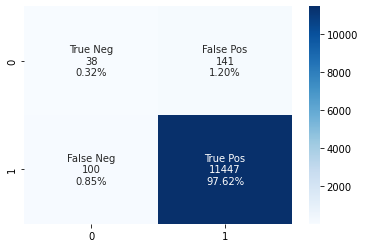

In [ ]:
testar_modelo(bestclf,df)

Mesmo com a realizando a otimização de hiperparamentro os resultados de avaliação ainda ficaram bem similares com o modelo padrão.


## **Variaveis que mais impactam o modelos**

In [ ]:
# Juntando features importances com os nomes de colunas e transfomando em um data frame
feature_importances =  pd.DataFrame(bestclf.feature_importances_, index = X_train.columns,columns=['importance']).reset_index()

# Renomeando os nomes de colunas
feature_importances.columns = ['features','importances']

In [ ]:
# ordenando as features de maior importancia para menor e selecionando as 10 maiores
feature_importances = feature_importances.sort_values(by='importances',ascending=False).head(10)

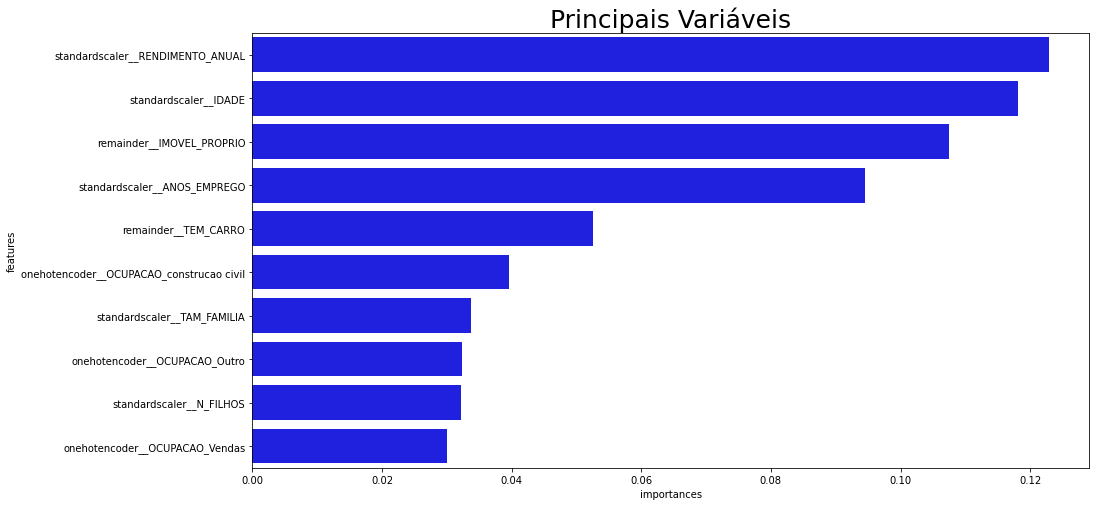

In [ ]:
# plotagem de importancia das features
plt.figure(figsize = (15, 8))
plt.title('Principais Variáveis',fontsize=25)
sns.barplot(data = feature_importances, x='importances', y='features',color='blue');

# **Criação do modelo para produção**

In [ ]:
opcao_Features = df_status[cat_col].apply(lambda x: x.unique(),axis=0)
opcao_Features

CAT_RENDA          [Trabalhando, Associado comercial, Pensionista...
ESCOLARIDADE       [Ensino superior, Ensino medio, Superior incom...
ESTADO_CIVIL       [Uniao estavel, Casado, Solteiro, Separado, Vi...
TIPO_RESIDENCIA    [Apartamento alugado, Casa/apartamento, moradi...
OCUPACAO           [Outro, Seguranca, Vendas, Contador, construca...
dtype: object

In [ ]:
dump(opcao_Features,'opcao_feature')

['opcao_feature']

In [ ]:
lista_features = df_status.drop('BOM',axis=1).columns
lista_features

Index(['CAT_RENDA', 'ESCOLARIDADE', 'ESTADO_CIVIL', 'TIPO_RESIDENCIA',
       'OCUPACAO', 'TAM_FAMILIA', 'IDADE', 'ANOS_EMPREGO', 'TEM_CARRO',
       'IMOVEL_PROPRIO', 'N_FILHOS', 'RENDIMENTO_ANUAL'],
      dtype='object')

In [ ]:
dump(lista_features,'lista_feature')

['lista_feature']

In [ ]:
pipe = make_pipeline(enc_scaler(cat_col,num_col),
                     SMOTE(),
                     RandomForestClassifier(bootstrap=False, max_features=26, min_samples_leaf=2,
                       min_samples_split=11, n_estimators=150, random_state=99))   

In [ ]:
df_status

,CAT_RENDA,ESCOLARIDADE,ESTADO_CIVIL,TIPO_RESIDENCIA,OCUPACAO,TAM_FAMILIA,IDADE,ANOS_EMPREGO,TEM_CARRO,IMOVEL_PROPRIO,N_FILHOS,RENDIMENTO_ANUAL,BOM
0,Trabalhando,Ensino superior,Uniao estavel,Apartamento alugado,Outro,2.0,33,13,1,1,0,427500.0,1
1,Trabalhando,Ensino superior,Uniao estavel,Apartamento alugado,Outro,2.0,33,13,1,1,0,427500.0,1
2,Trabalhando,Ensino medio,Casado,Casa/apartamento,Seguranca,2.0,59,4,1,1,0,112500.0,1
3,Associado comercial,Ensino medio,Solteiro,Casa/apartamento,Vendas,1.0,53,9,0,1,0,270000.0,1
4,Associado comercial,Ensino medio,Solteiro,Casa/apartamento,Vendas,1.0,53,9,0,1,0,270000.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
35526,Trabalhando,Ensino medio,Casado,Casa/apartamento,Lider de equipe,3.0,30,5,1,1,1,157500.0,1
35527,Trabalhando,Ensino medio,Casado,Casa/apartamento,Lider de equipe,3.0,30,5,1,1,1,157500.0,1
35528,Trabalhando,Ensino medio,Casado,Casa/apartamento,Lider de equipe,3.0,30,5,1,1,1,157500.0,1
35529,Trabalhando,Ensino medio,Casado,Casa/apartamento,Lider de equipe,3.0,30,5,1,1,1,157500.0,1


## **Treinamento da pipeline**

In [ ]:
X_treino = df_status.drop('BOM',axis=1)
y_treino = df_status['BOM']

In [ ]:
pipe.fit(X_treino,y_treino)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(),
                                                  ['CAT_RENDA', 'ESCOLARIDADE',
                                                   'ESTADO_CIVIL',
                                                   'TIPO_RESIDENCIA',
                                                   'OCUPACAO']),
                                                 ('standardscaler',
                                                  StandardScaler(),
                                                  ['TAM_FAMILIA', 'IDADE',
                                                   'ANOS_EMPREGO', 'N_FILHOS',
                                                   'RENDIMENTO_ANUAL'])])),
                ('smote', SMOTE()),
                ('randomforestclassifier',
                 RandomForestClassifier(b

In [ ]:
dump(pipe,'modelo_pipe.joblib')

['modelo_pipe.joblib']